<a href="https://colab.research.google.com/github/Rage1010/RL/blob/midterm/PoleCart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install moviepy

In [2]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
import gymnasium as gym
from moviepy.editor import ImageSequenceClip
from IPython.display import Video
env  = gym.make("CartPole-v1", render_mode="rgb_array")

In [5]:
observation, info = env.reset()

This imports the environment.

In [56]:
epsilon = 0.80
ep_count = 1
frames = []
action_value = np.zeros((10,10,10,10,2))
gamma = 0.9
lamda = 0.9
l = [0,1]
alpha = 0.5
r = []
number_of_times_seen = np.ones((10,10,10,10,2))

In [7]:
def f(pos):
  s = int(((pos * 600.0)/12.0) + 5)
  s = max(s, 0)
  s = min(s, 9)
  return s
def f2(vel):
  s = int(((vel * 100.0)/11.0) + 5)
  s = max(s, 0)
  s = min(s, 9)
  return s
def f3(apos):
  s = int(((apos * 25.0)/0.419) + 5)
  s = max(s, 0)
  s = min(s, 9)
  return s
def f4(avel):
  s = int(((avel * 80.0)/8.0) + 5)
  s = max(s, 0)
  s = min(s, 9)
  return s

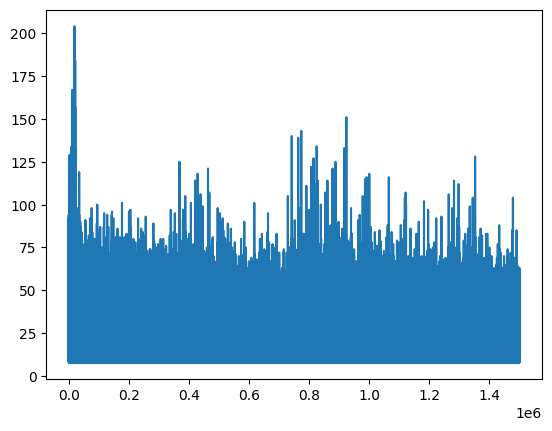

In [57]:
for p in range(1500000):
  init = random.uniform(0, 1)
  observation, info = env.reset()
  action = np.argmax(action_value[f(observation[0])][f2(observation[1])][f3(observation[2])][f4(observation[3])])
  if init > epsilon:
    action = random.choice(l)
  pos = f(observation[0])
  vel = f2(observation[1])
  apos = f3(observation[2])
  avel = f4(observation[3])
  elig_trace = np.zeros((10,10,10,10,2))
  rwd = 0
  for t in range(500):
      # print(t)
      alpha = 1.0/(len(r)+1)
      # if p == 499:
      #   frames.append(env.render())
      number_of_times_seen[pos][vel][apos][avel][action] += 1
      observation, reward, terminated, truncated, info = env.step(action)
      posdash = f(observation[0])
      veldash = f2(observation[1])
      aposdash = f3(observation[2])
      aveldash = f4(observation[3])
      dice = random.uniform(0, 1)
      actiondash = 0
     #  print(posdash, veldash, aposdash, aveldash)
      vals = action_value[posdash][veldash][aposdash][aveldash]
      if vals[1] > vals[0]:
        actiondash = 1
      if vals[0] == vals[1]:
        if dice > 0.5:
          actiondash = 1
      else:
        if dice > (epsilon+1)/2:
          actiondash = 1 - actiondash
      delta = reward + gamma * action_value[posdash][veldash][posdash][aveldash][actiondash] - action_value[pos][vel][apos][avel][action]
      elig_trace[pos][vel][apos][avel][action] += 1
      action_value += delta * ( elig_trace / number_of_times_seen )
      elig_trace *= (gamma * lamda)
      # if pos == 5 and vel == 5 and apos == 5 and avel == 5:
      #   print(elig_trace[pos][vel][apos][avel])
      #   print(number_of_times_seen[pos][vel][apos][avel])
      #   print(reward)
      #   print(delta)
      #   print(action_value[pos][vel][apos][avel])
      pos , vel , apos, avel, action = posdash, veldash, aposdash, aveldash, actiondash
      rwd += reward
      if terminated or truncated:
        break
  r.append(rwd)
env.close()
x = [i + 1 for i in range(len(r))]
plt.plot(x, r)
plt.show()
# clip = ImageSequenceClip(frames, fps=30)
# clip.write_videofile('/home/raghav/Desktop/RL/cartpole.mp4')
# Video('/home/raghav/Desktop/RL/cartpole.mp4', embed=True)


In [1]:
print(action_value[5][5][5][5][0])

NameError: name 'action_value' is not defined

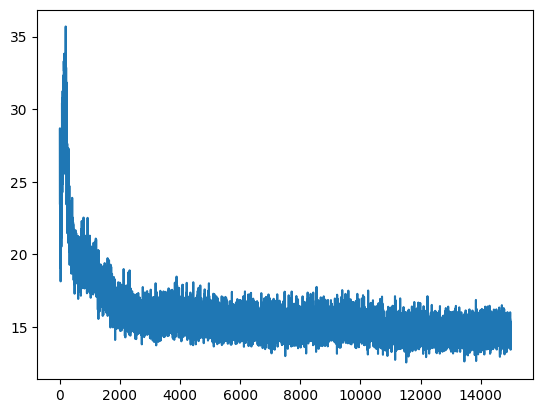

In [58]:
t = np.array(r)
array = []
for e in range(15000):
  array.append(np.mean(r[(100 * e) : (100 * (e + 1))]))
x = [i + 1 for i in range(len(array))]
plt.plot(x, array)
plt.show()

In [ ]:
for p in range(200000):
  ldone = set()
  observation, info = env.reset()
  action = random.choice(l)
  pos = f(observation[0])
  vel = f2(observation[1])
  apos = f3(observation[2])
  avel = f4(observation[3])
  elig_trace = np.zeros((10,10,10,10,2))
  rwd = 0
  for t in range(500):
      # print(t)
      alpha = 1.0/(len(r)+1)
      # if p == 499:
      #   frames.append(env.render())
      observation, reward, terminated, truncated, info = env.step(action)
      ldone.add((pos, vel, apos, avel, action))
      posdash = f(observation[0])
      veldash = f2(observation[1])
      aposdash = f3(observation[2])
      aveldash = f4(observation[3])
      dice = random.uniform(0, 1)
      actiondash = 0
     # print(posdash, veldash, aposdash, aveldash)
      vals = action_value[posdash][veldash][aposdash][aveldash]
      if vals[1] > vals[0]:
        actiondash = 1
      if vals[0] == vals[1]:
        if dice > 0.5:
          actiondash = 1
      else:
        if dice > (epsilon+1)/2:
          actiondash = 1 - actiondash
      delta = reward + gamma * action_value[posdash][veldash][posdash][aveldash][actiondash] - action_value[pos][vel][apos][avel][action]
      elig_trace[pos][vel][apos][avel][action] += 1
      for w in ldone:
        action_value[w[0]][w[1]][w[2]][w[3]][w[4]] += alpha * delta * elig_trace[w[0]][w[1]][w[2]][w[3]][w[4]]
        elig_trace[w[0]][w[1]][w[2]][w[3]][w[4]] *= (gamma * lamda)
      pos , vel , apos, avel, action = posdash, veldash, aposdash, aveldash, actiondash
      rwd += reward
      if terminated or truncated:
        break
  #r.append(rwd)
env.close()
# x = [i + 1 for i in range(len(r))]
# plt.plot(x, r)
# plt.show()
# clip = ImageSequenceClip(frames, fps=30)
# clip.write_videofile('/home/raghav/Desktop/RL/cartpole.mp4')
# Video('/home/raghav/Desktop/RL/cartpole.mp4', embed=True)


In [48]:
# c = 0
# for p in range(10):
#   for q in range(10):
#     for r in range(10):
#       for s in range(10):
#         if action_value[p][q][r][s][0] < action_value[p][q][r][s][1]:
#           c+=1
# print(c)
print(action_value[6][6][6][7])

[0. 0.]


In [ ]:
for p in range(1):
  frames = []
  ldone = set()
  observation, info = env.reset()
  action = random.choice(l)
  pos = f(observation[0])
  vel = f2(observation[1])
  apos = f3(observation[2])
  avel = f4(observation[3])
  elig_trace = np.zeros((20,20,20,20,2))
  rwd = 0
  for t in range(500):
      # print(t)
      #alpha = 1.0/(t+1)
      # if p == 499:
      frames.append(env.render())
      observation, reward, terminated, truncated, info = env.step(action)
      ldone.add((pos, vel, apos, avel, action))
      posdash = f(observation[0])
      veldash = f2(observation[1])
      aposdash = f3(observation[2])
      aveldash = f4(observation[3])
      dice = random.uniform(0, 1)
      actiondash = 0
     # print(posdash, veldash, aposdash, aveldash)
      vals = action_value[posdash][veldash][aposdash][aveldash]
      if vals[1] > vals[0]:
        actiondash = 1
      if terminated or truncated:

        break
  #r.append(rwd)
env.close()
# x = [i + 1 for i in range(len(r))]
# plt.plot(x, r)
# plt.show()
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile('/content/cartpole.mp4')
Video('/content/cartpole.mp4', embed=True)


t:  20%|██        | 2/10 [00:49<03:18, 24.85s/it, now=None]

Moviepy - Building video /content/cartpole.mp4.
Moviepy - Writing video /content/cartpole.mp4




t:  20%|██        | 2/10 [00:50<03:21, 25.16s/it, now=None]

Moviepy - Done !
Moviepy - video ready /content/cartpole.mp4


In [59]:
observation, info = env.reset()
frames = []
while True:
  frames.append(env.render())
  action = np.argmax(action_value[f(observation[0])][f2(observation[1])][f3(observation[2])][f4(observation[3])])
  observation, reward, terminated, truncated, info = env.step(action)
  print(f(observation[0]), f2(observation[1]), f3(observation[2]), f4(observation[3]))
  print(action)
  if terminated or truncated:
    print(f(observation[0]), f2(observation[1]), f3(observation[2]), f4(observation[3]))
    print(action)
    break
env.close()
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile('/content/cartpole.mp4')
Video('/content/cartpole.mp4', embed=True)


5 3 6 8
0
5 1 6 9
0
4 0 7 9
0
4 1 8 9
1
4 0 9 9
0
3 0 9 9
0
2 0 9 9
0
1 0 9 9
0
0 0 9 9
0
0 0 9 9
0
0 0 9 9
0
Moviepy - Building video /content/cartpole.mp4.
Moviepy - Writing video /content/cartpole.mp4



Moviepy - Done !
Moviepy - video ready /content/cartpole.mp4


In [51]:
print(action_value[3][3][3][5])

[6.06096418 7.15345996]
